<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# Test Environment for Generative AI classroom labs

This lab provides a test environment for the codes generated using the Generative AI classroom.

Follow the instructions below to set up this environment for further use.


# Setup


### Install required libraries

In case of a requirement of installing certain python libraries for use in your task, you may do so as shown below.


In [1]:
# Install required libraries.

%pip install seaborn
import piplite

await piplite.install(['nbformat', 'plotly'])

### Dataset URL from the GenAI lab
Use the URL provided in the GenAI lab in the cell below. 


In [2]:
# Use the URL provided in the GenAI lab in the cell below.

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"

### Downloading the dataset

Execute the following code to download the dataset in to the interface.

> Please note that this step is essential in JupyterLite. If you are using a downloaded version of this notebook and running it on JupyterLabs, then you can skip this step and directly use the URL in pandas.read_csv() function to read the dataset as a dataframe


In [3]:
# Downloading the dataset.

from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = URL

await download(path, "dataset.csv")

---


# Test Environment


In [4]:
# Importing the Dataset.

# You can begin by using the Generative AI model to create a python script that can load the dataset to a pandas dataframe. The dataset file already has the headers in the first row.

## Write a Python code that can perform the following tasks.
## 1. Read the CSV file, located on a given path, into a pandas dataframe, assuming that the first row of the file can be used as the headers for the data.
## 2. Print the first 5 rows of the dataframe to verify correct loading.

import pandas as pd

# Read the CSV file from the provided URL into a pandas DataFrame
# Assume the first row contains column headers
df = pd.read_csv('dataset.csv', header = 0)

# Print the first 5 rows of the DataFrame
print("First 5 rows of the DataFrame:")
print(df.head())

# Example usage:
# Replace 'http://example.com/file.csv' with your actual CSV URL
# url = 'http://example.com/file.csv'
# read_csv_from_url(url)

<ipython-input-4-1fba8081c99d>:9: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


First 5 rows of the DataFrame:
     model  year transmission  mileage fuelType    tax   mpg  engineSize  \
0   Fiesta  2017    Automatic    15944   Petrol  150.0  57.7         1.0   
1    Focus  2018       Manual     9083   Petrol  150.0  57.7         1.0   
2    Focus  2017       Manual    12456   Petrol  150.0  57.7         1.0   
3   Fiesta  2019       Manual    10460   Petrol  145.0  40.3         1.5   
4   Fiesta  2019    Automatic     1482   Petrol  145.0  48.7         1.0   

   price  
0  12000  
1  14000  
2  13000  
3  17500  
4  16500  


In [5]:
# Data Preparation.

# Data Cleaning.
# At this stage, it is required to clean up the data. As has been informed to you, the data may have missing values and duplicate entries. Write a prompt that performs the following tasks.

## Write a Python code that accomplishes the following tasks:
## 1. Detect the columns in a DataFrame that contain missing values.
## 2. Substitute the identified missing values with the mean of their respective columns.
## 3. Removes any duplicate entries from the DataFrame.

import pandas as pd

# Assuming df is your DataFrame
# Example: df = pd.read_csv('your_dataset.csv')

# 1. Identify the columns with missing values
missing_columns = df.columns[df.isnull().any()]

# 2. Replace missing values with the mean value of the column
for column in missing_columns:
    df[column].fillna(df[column].mean(), inplace=True)

# 3. Delete duplicate entries from the DataFrame
df.drop_duplicates(inplace = True)

# 4. Save the cleaned DataFrame to a new CSV file
df.to_csv('clean_dataset.csv', index = False)

# Optional: Print the cleaned DataFrame
print(df)

<ipython-input-5-685aa4f17546>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


         model  year transmission  mileage fuelType    tax   mpg  engineSize  \
0       Fiesta  2017    Automatic    15944   Petrol  150.0  57.7         1.0   
1        Focus  2018       Manual     9083   Petrol  150.0  57.7         1.0   
2        Focus  2017       Manual    12456   Petrol  150.0  57.7         1.0   
3       Fiesta  2019       Manual    10460   Petrol  145.0  40.3         1.5   
4       Fiesta  2019    Automatic     1482   Petrol  145.0  48.7         1.0   
...        ...   ...          ...      ...      ...    ...   ...         ...   
17961    B-MAX  2017       Manual    16700   Petrol  150.0  47.1         1.4   
17962    B-MAX  2014       Manual    40700   Petrol   30.0  57.7         1.0   
17963    Focus  2015       Manual     7010   Diesel   20.0  67.3         1.6   
17964       KA  2018       Manual     5007   Petrol  145.0  57.7         1.2   
17965    Focus  2015       Manual     5007   Petrol   22.0  57.7         1.0   

       price  
0      12000  
1      14

In [6]:
# Print the cleaned / updated dataframe.

# Read the CSV file into a DataFrame
df = pd.read_csv('clean_dataset.csv')

## Print the first 5 rows of the cleaned / updated DataFrame.
print("First 5 rows of the updated DataFrame:")
print(df.head())

First 5 rows of the updated DataFrame:
     model  year transmission  mileage fuelType    tax   mpg  engineSize  \
0   Fiesta  2017    Automatic    15944   Petrol  150.0  57.7         1.0   
1    Focus  2018       Manual     9083   Petrol  150.0  57.7         1.0   
2    Focus  2017       Manual    12456   Petrol  150.0  57.7         1.0   
3   Fiesta  2019       Manual    10460   Petrol  145.0  40.3         1.5   
4   Fiesta  2019    Automatic     1482   Petrol  145.0  48.7         1.0   

   price  
0  12000  
1  14000  
2  13000  
3  17500  
4  16500  


In [25]:
# Data Insights and Visualization.
# Write prompts that generate codes to perform the following actions.

## Write a python code that identifies the top 5 attributes with highest correlation with the target attribute "price" in a dataframe.

import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# Read the CSV file into a DataFrame
df = pd.read_csv('clean_dataset.csv')

def top_correlated_attributes(df, target_column = 'price'):
    # Step 1: Handle missing values - dropping rows with any missing values
    df_cleaned = df.dropna(subset = [target_column])
    
    # Step 2: Calculate correlation matrix
    correlation_matrix = df_cleaned.corr()[target_column].abs()
    
    # Step 3: Identify the top 5 correlated attributes
    top_correlations = correlation_matrix.sort_values(ascending = False)[:5]
    
    # Step 4: Retrieve corresponding attribute names
    top_correlated_attrs = top_correlations.index.tolist()
    
    print("Top 5 attributes most highly correlated with 'price':")
    for attr, corr in top_correlations.items():
        print(f"{attr}: {corr:.4f}")
    print("\n")
        
df = pd.DataFrame(data)
    
top_correlated_attributes(df)

Top 5 attributes most highly correlated with 'price':
attr1: 1.0000
price: 1.0000
attr2: 0.9820
attr3: 0.9820




In [8]:
# Data Insights and Visualization.
# Write prompts that generate codes to perform the following actions.

## Write a python code that counts the number of cars under each unique value of the 'fuelType' attribute in a dataframe.

import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('clean_dataset.csv')

# Specify the attribute/column you want to analyze
attribute = 'fuelType'  # Replace with the column name you want to count unique values for

# Count the number of occurrences for each unique value in the specified attribute
value_counts = df[attribute].value_counts()

# Display the result
print(value_counts)

fuelType
Petrol      12081
Diesel       5706
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64


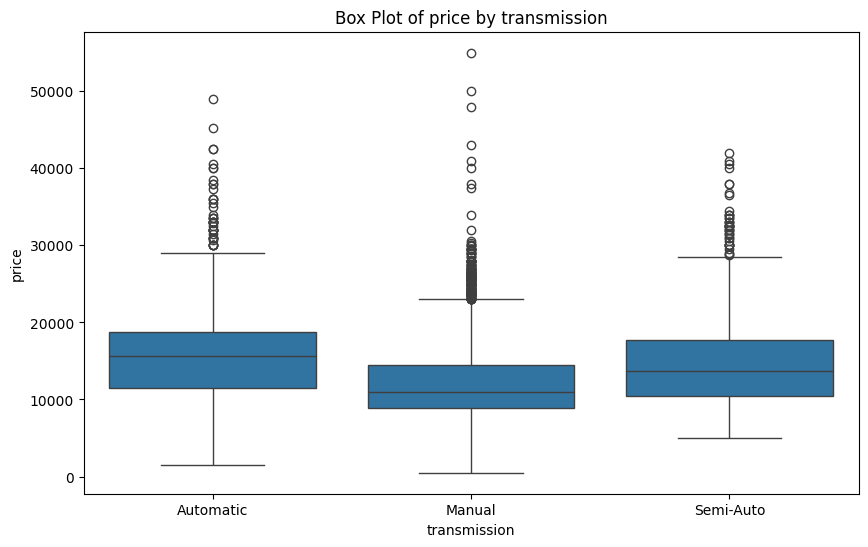

In [14]:
# Data Insights and Visualization.
# Write prompts that generate codes to perform the following actions.

## Write a Python code that generates a Seaborn box plot comparing a source attribute (transmission) and a target attribute (price) from a DataFrame.

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('clean_dataset.csv')

# Define the source and target attributes
source_attribute = 'transmission'  # Replace this with the column name I want as the source (categorical)
target_attribute = 'price'         # Replace this with the column name I want as the target (numerical)

# Create a Seaborn box plot
plt.figure(figsize = (10, 6))
sns.boxplot(x = source_attribute, y = target_attribute, data = df)

# Display the plot
plt.title(f'Box Plot of {target_attribute} by {source_attribute}')
plt.show()

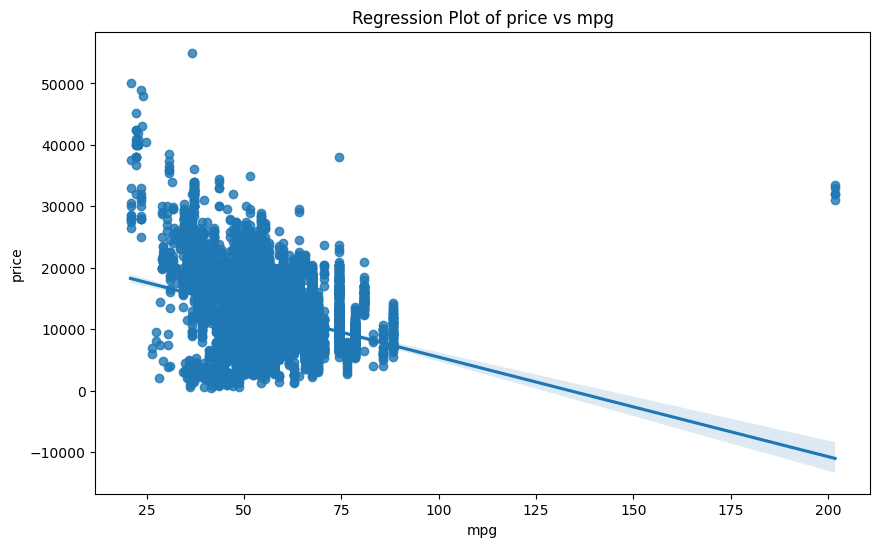

In [23]:
# Data Insights and Visualization.
# Write prompts that generate codes to perform the following actions.

## Write a Python code that generates the regression plot to compare a source attribute (mpg) with a target attribute (price) and determine the correlation type between the two.

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('clean_dataset.csv')

# Define the source and target attributes
source_attribute = 'mpg'
target_attribute = 'price'

# Create a regression plot
plt.figure(figsize = (10, 6))
sns.regplot(x = source_attribute, y = target_attribute, data = df)

# Display the plot
plt.title(f'Regression Plot of {target_attribute} vs {source_attribute}')
plt.xlabel(source_attribute)
plt.ylabel(target_attribute)
plt.show()

In [24]:
# Model Development and Evaluation
# Write prompts that generate codes to perform the following actions.

## Write a Python code that trains a linear regression model with a source attribute (mpg) to predict a target attribute (price). Then calculate the R² and MSE values for the model.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Read the CSV file into a DataFrame
df = pd.read_csv('clean_dataset.csv')

# Define the source and target attributes
source_variable = 'mpg'  # Replace with the column name for the source variable
target_variable = 'price'  # Replace with the column name for the target variable

# Split the data into features (X) and target (y)
X = df[[source_variable]]  # Features (source variable)
y = df[target_variable]  # Target (dependent variable)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate R² and MSE
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Display the results
print(f'R²: {r_squared:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')

R²: 0.1504
Mean Squared Error (MSE): 19049855.1401


In [25]:
# Model Development and Evaluation.
# Write prompts that generate codes to perform the following actions.

## Write a Python code that trains a linear regression model with source attributes (year), (mileage), (tax), (mpg) and (engineSize) to predict a target attribute (price). 
## Then calculate the R² and MSE values for the model.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Read the CSV file into a DataFrame
df = pd.read_csv('clean_dataset.csv')

# Define the features (source variables) and target variable
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
target = 'price'

# Split the data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R² and MSE
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Output the results
print(f'R²: {r_squared:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')

R²: 0.6917
Mean Squared Error (MSE): 6912744.9107


In [27]:
# Model Development and Evaluation.
# Write prompts that generate codes to perform the following actions.

## Write a Python code that accomplishes the following tasks:

## 1. Construct a pipeline that includes standard scaler, second-degree polynomial features, and a linear regression model.
## 2. Train this pipeline on a target variable using a specified set of source attributes from a dataframe.
## 3. Calculate the R² and MSE values for the model.

import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Read the CSV file into a DataFrame
df = pd.read_csv('clean_dataset.csv')

# Specify the features and target variable
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
target = 'price'

# Split the data into features (X) and target (y)
X = df[features]
y = df[target]

# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree = 2)),
    ('lin_reg', LinearRegression())
])

# Fit the pipeline on the data
pipeline.fit(X, y)

# Make predictions
y_pred = pipeline.predict(X)

# Calculate R² and MSE
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

# Print the results
print(f'R²: {r2:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')

R²: 0.7667
Mean Squared Error (MSE): 5234038.0655


In [26]:
# Model Development and Evaluation.
# Write prompts that generate codes to perform the following actions.

## Write a Python code that accomplishes the following tasks:

## 1. Given a DataFrame where a subset of attributes are considered source attributes and one is designated as the target attribute, split the data into training and testing sets, with the testing portion being 20%.
## 2. Construct and fit a Ridge regression model using the training data, setting the regularization parameter to 0.10.
## 3. Calculate the MSE and R² values for the Ridge Regression Model using the testing data.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Read the CSV file into a DataFrame
df = pd.read_csv('clean_dataset.csv')

# Define source attributes and target attribute
source_attributes = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
target_attribute = 'price'

# Split the data into training and testing sets (80% train, 20% test)
X = df[source_attributes]
y = df[target_attribute]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# Construct and fit the Ridge regression model
ridge_model = Ridge(alpha = 0.10)  # Set regularization parameter to 0.10
ridge_model.fit(X_train, y_train)

# Predict using the test data
y_pred = ridge_model.predict(X_test)

# Calculate MSE and R² values
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f'R²: {r2}')
print(f'Mean Squared Error (MSE): {mse}')

R²: 0.6917134446113138
Mean Squared Error (MSE): 6912725.801054926


In [29]:
# Model Development and Evaluation.
# Write prompts that generate codes to perform the following actions.

## Write a Python code that accomplishes the following tasks:

## 1. Given a DataFrame where a subset of attributes are considered source attributes and one is designated as the target attribute, split the data into training and testing sets, with the testing portion being 20%.
## 2. Perform a second-degree polynomial transformation on both the training and testing datasets.
## 3. Construct and fit a Ridge regression model using the training data, setting the regularization parameter to 0.10.
## 4. Calculate the MSE and R² values for the Ridge Regression Model utilising the modified test data.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Read the CSV file into a DataFrame
df = pd.read_csv('clean_dataset.csv')

# Define source attributes and target attribute
source_attributes = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
target_attribute = 'price'

# 1. Split the data into training and testing sets (80% training, 20% testing)
X = df[source_attributes]
y = df[target_attribute]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# 2. Apply second-degree polynomial transformation
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# 3. Construct and fit a Ridge regression model
ridge_model = Ridge(alpha = 0.10)  # Regularization parameter set to 0.10
ridge_model.fit(X_train_poly, y_train)

# 4. Calculate MSE and R² values
y_pred = ridge_model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f'R²: {r2}')
print(f'Mean Squared Error (MSE): {mse}')

/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.17676e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


R²: 0.6732748888228912
Mean Squared Error (MSE): 7326174.516559619


In [31]:
# Model Development and Evaluation.
# Write prompts that generate codes to perform the following actions.

## Write a Python code that accomplishes the following tasks:

## 1. Given a DataFrame where a subset of attributes are considered source attributes and one is designated as the target attribute, split the data into training and testing sets, with the testing portion being 20%.
## 2. Perform a second-degree polynomial transformation on both the training and testing datasets.
## 3. Construct and fit a Grid search on the Ridge regression model with cross validation using the training data, for a set of values of the parameter alpha {0.01, 0.1, 1, 10, 100}.
## 4. Calculate the MSE and R² values for the Ridge Regression Model utilising the modified test data.

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Read the CSV file into a DataFrame
df = pd.read_csv('clean_dataset.csv')

# Define source attributes and target attribute
source_attributes = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
target_attribute = 'price'

# 1. Split the data into training and testing sets (80% training, 20% testing)
X = df[source_attributes]
y = df[target_attribute]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# Step 2: Apply second-degree polynomial transformation
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Step 3: Perform Grid Search on Ridge regression
ridge = Ridge()
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(estimator = ridge, param_grid = param_grid, cv = 4)
grid_search.fit(X_train_poly, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# 4. Calculate MSE and R² values
y_pred = best_model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# Print the results
print("Best Alpha:", grid_search.best_params_['alpha'])
print("R²:", r_squared)
print("Mean Squared Error (MSE):", mse)

/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.93807e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.88233e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.01744e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.78199e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.93807e-24): res

Best Alpha: 0.01
R²: 0.38273414165607345
Mean Squared Error (MSE): 13840985.117578594


## Authors


[Abhishek Gagneja](https://www.linkedin.com/in/abhishek-gagneja-23051987/)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-12-10|0.1|Abhishek Gagneja|Initial Draft created|


Copyright © 2023 IBM Corporation. All rights reserved.
